# Imports

In [1]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [2]:
year = 2022
gp_round = 6
ses = 'Q'

In [3]:
driver_1 = 'VER'
driver_2 = 'LEC'
team_1 = 'Red Bull'
team_2 = 'Ferrari'

In [71]:
events_list = ff1.get_event_schedule(2022)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev


In [ ]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

In [72]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True,JPN
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True,USA
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True,MXC
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True,SAO


In [6]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [7]:
results = session.results

In [8]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-21 14:58:14.758,0 days 01:13:14.745000,,2203.649167,0 days 00:00:00,11475,286,7,100,False,12,interpolation,0.087106,0.000019,OnTrack,825,-469,1706
3,2022-05-21 14:58:14.786,0 days 01:13:14.773000,,2203.649167,0 days 00:00:00.028000,11498,287,7,100,False,12,car,2.327778,0.000502,OnTrack,813,-488,1706
4,2022-05-21 14:58:14.918,0 days 01:13:14.905000,,2203.649167,0 days 00:00:00.160000,11517,288,7,100,False,12,pos,12.927604,0.002786,OnTrack,756,-577,1707
5,2022-05-21 14:58:15.106,0 days 01:13:15.093000,1,2203.649167,0 days 00:00:00.348000,11537,290,7,100,False,12,car,28.105556,0.006057,OnTrack,674,-705,1707
6,2022-05-21 14:58:15.218,0 days 01:13:15.205000,1,2200.915833,0 days 00:00:00.460000,11545,290,7,99,False,12,pos,37.175711,0.008012,OnTrack,627,-781,1708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-05-21 14:59:33.147,0 days 01:14:33.134000,1,1451.410000,0 days 00:01:18.389000,11392,283,7,100,False,12,car,4608.151111,0.993163,OnTrack,982,-224,1706
606,2022-05-21 14:59:33.218,0 days 01:14:33.205000,1,1448.465556,0 days 00:01:18.460000,11402,284,7,100,False,12,pos,4613.759555,0.994372,OnTrack,950,-276,1707
607,2022-05-21 14:59:33.347,0 days 01:14:33.334000,1,1445.521111,0 days 00:01:18.589000,11412,285,7,100,False,12,car,4623.984444,0.996576,OnTrack,893,-363,1707
608,2022-05-21 14:59:33.478,0 days 01:14:33.465000,1,1445.521111,0 days 00:01:18.720000,11458,285,7,100,False,12,pos,4634.386917,0.998818,OnTrack,834,-456,1707


In [9]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:08.634000,34.5,21.0,1004.0,False,47.9,178,3.0
1,0 days 00:01:08.633000,34.6,21.0,1003.7,False,47.4,177,3.2
2,0 days 00:02:08.633000,34.5,22.0,1003.9,False,47.3,166,2.4
3,0 days 00:03:08.636000,34.4,22.0,1003.9,False,47.5,168,2.9
4,0 days 00:04:08.640000,34.5,21.0,1003.7,False,47.5,169,2.5
...,...,...,...,...,...,...,...,...
73,0 days 01:13:08.842000,34.8,18.0,1003.0,False,46.5,155,4.0
74,0 days 01:14:08.867000,34.6,18.0,1002.9,False,46.5,186,3.5
75,0 days 01:15:08.843000,34.7,17.0,1002.9,False,46.6,157,3.5
76,0 days 01:16:08.858000,34.6,18.0,1002.9,False,46.6,159,2.2


In [10]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [11]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [12]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [13]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [35]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [34]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [16]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:23:45.447000,16,0 days 00:01:19.861000,2,1,NaT,NaT,0 days 00:00:22.333000,0 days 00:00:29.923000,0 days 00:00:27.605000,0 days 00:22:47.919000,0 days 00:23:17.842000,0 days 00:23:45.447000,285.0,305.0,286.0,319.0,False,SOFT,2.0,True,0 days 00:22:25.586000,Ferrari,LEC,1,True,2022-05-21 14:07:25.599
4,0 days 00:47:31.492000,16,0 days 00:01:19.969000,5,2,NaT,NaT,0 days 00:00:22.190000,0 days 00:00:29.954000,0 days 00:00:27.825000,0 days 00:46:33.713000,0 days 00:47:03.667000,0 days 00:47:31.492000,287.0,307.0,287.0,321.0,False,SOFT,6.0,False,0 days 00:46:11.523000,Ferrari,LEC,1,True,2022-05-21 14:31:11.536
9,0 days 01:14:33.495000,16,0 days 00:01:18.750000,10,4,NaT,NaT,0 days 00:00:22.004000,0 days 00:00:29.410000,0 days 00:00:27.336000,0 days 01:13:36.749000,0 days 01:14:06.159000,0 days 01:14:33.495000,285.0,306.0,282.0,316.0,True,SOFT,3.0,True,0 days 01:13:14.745000,Ferrari,LEC,1,True,2022-05-21 14:58:14.758
12,0 days 00:22:22.572000,1,0 days 00:01:20.091000,2,1,NaT,NaT,0 days 00:00:22.163000,0 days 00:00:30.047000,0 days 00:00:27.881000,0 days 00:21:24.644000,0 days 00:21:54.691000,0 days 00:22:22.572000,287.0,304.0,281.0,321.0,False,SOFT,NaN,True,0 days 00:21:02.481000,Red Bull Racing,VER,1,True,2022-05-21 14:06:02.494
15,0 days 00:47:40.573000,1,0 days 00:01:20.109000,5,2,NaT,NaT,0 days 00:00:22.222000,0 days 00:00:30.090000,0 days 00:00:27.797000,0 days 00:46:42.686000,0 days 00:47:12.776000,0 days 00:47:40.573000,289.0,308.0,285.0,322.0,False,SOFT,6.0,False,0 days 00:46:20.464000,Red Bull Racing,VER,1,True,2022-05-21 14:31:20.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0 days 00:24:43.480000,23,0 days 00:01:21.645000,2,1,NaT,NaT,0 days 00:00:22.570000,0 days 00:00:30.748000,0 days 00:00:28.327000,0 days 00:23:44.405000,0 days 00:24:15.153000,0 days 00:24:43.480000,283.0,293.0,285.0,322.0,True,SOFT,2.0,True,0 days 00:23:21.835000,Williams,ALB,1,True,2022-05-21 14:08:21.848
243,0 days 00:34:12.454000,23,0 days 00:01:22.429000,5,2,NaT,NaT,0 days 00:00:22.618000,0 days 00:00:31.374000,0 days 00:00:28.437000,0 days 00:33:12.643000,0 days 00:33:44.017000,0 days 00:34:12.454000,278.0,288.0,289.0,333.0,False,SOFT,3.0,True,0 days 00:32:50.025000,Williams,ALB,1,True,2022-05-21 14:17:50.038
246,0 days 00:20:37.221000,6,0 days 00:01:22.347000,2,1,NaT,NaT,0 days 00:00:22.679000,0 days 00:00:31.022000,0 days 00:00:28.646000,0 days 00:19:37.553000,0 days 00:20:08.575000,0 days 00:20:37.221000,286.0,286.0,282.0,321.0,False,SOFT,2.0,True,0 days 00:19:14.874000,Williams,LAT,1,True,2022-05-21 14:04:14.887
249,0 days 00:25:42.270000,6,0 days 00:01:23.079000,5,1,NaT,NaT,0 days 00:00:22.648000,0 days 00:00:31.511000,0 days 00:00:28.920000,0 days 00:24:41.839000,0 days 00:25:13.350000,0 days 00:25:42.270000,282.0,295.0,283.0,324.0,False,SOFT,5.0,True,0 days 00:24:19.191000,Williams,LAT,1,True,2022-05-21 14:09:19.204


In [17]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [18]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [19]:
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [20]:
lap_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2022-05-21 14:51:12.336,0 days 01:06:12.323000,,527.836667,0 days 00:00:00,11442,290,7,100,False,12,interpolation,0.064195,0.000014,OnTrack,774,-550,1706
1,2022-05-21 14:51:12.545,0 days 01:06:12.532000,,527.836667,0 days 00:00:00.209000,11538,293,7,100,False,12,car,17.088056,0.003677,OnTrack,704,-658,1707
2,2022-05-21 14:51:12.865,0 days 01:06:12.852000,11,527.836667,0 days 00:00:00.529000,10617,295,7,100,False,12,car,43.310278,0.009318,OnTrack,587,-843,1708
3,2022-05-21 14:51:13.105,0 days 01:06:13.092000,11,529.303333,0 days 00:00:00.769000,10573,297,8,100,False,12,car,63.110278,0.013578,OnTrack,425,-1098,1708
4,2022-05-21 14:51:13.265,0 days 01:06:13.252000,11,530.236667,0 days 00:00:00.929000,10664,299,8,100,False,12,car,76.399167,0.016437,OnTrack,333,-1243,1708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2022-05-21 14:52:30.265,0 days 01:07:30.252000,11,470.167500,0 days 00:01:17.929000,10922,275,7,100,False,12,car,4546.518889,0.978186,OnTrack,1304,270,1712
305,2022-05-21 14:52:30.505,0 days 01:07:30.492000,11,471.434167,0 days 00:01:18.169000,10980,276,7,100,False,12,car,4564.918889,0.982145,OnTrack,1204,117,1709
306,2022-05-21 14:52:30.706,0 days 01:07:30.693000,11,472.104167,0 days 00:01:18.370000,11099,281,7,100,False,12,car,4580.608056,0.985520,OnTrack,1117,-17,1708
307,2022-05-21 14:52:31.146,0 days 01:07:31.133000,11,472.104167,0 days 00:01:18.810000,11347,287,7,100,False,12,car,4615.685833,0.993067,OnTrack,923,-317,1707


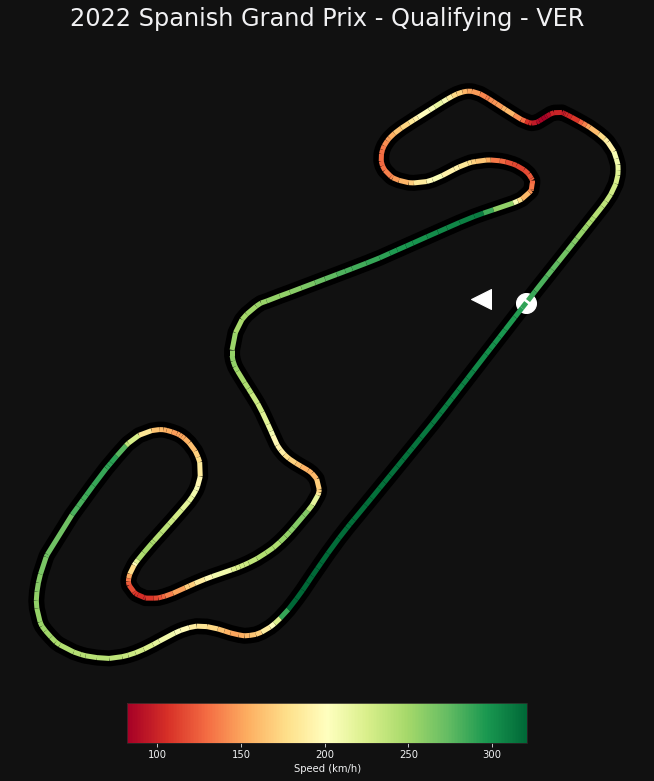

In [21]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

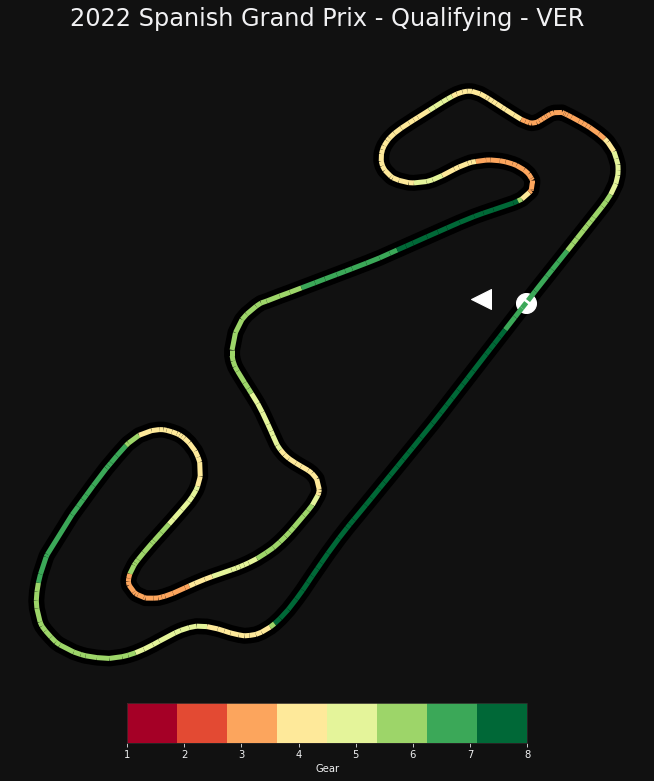

In [22]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [23]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

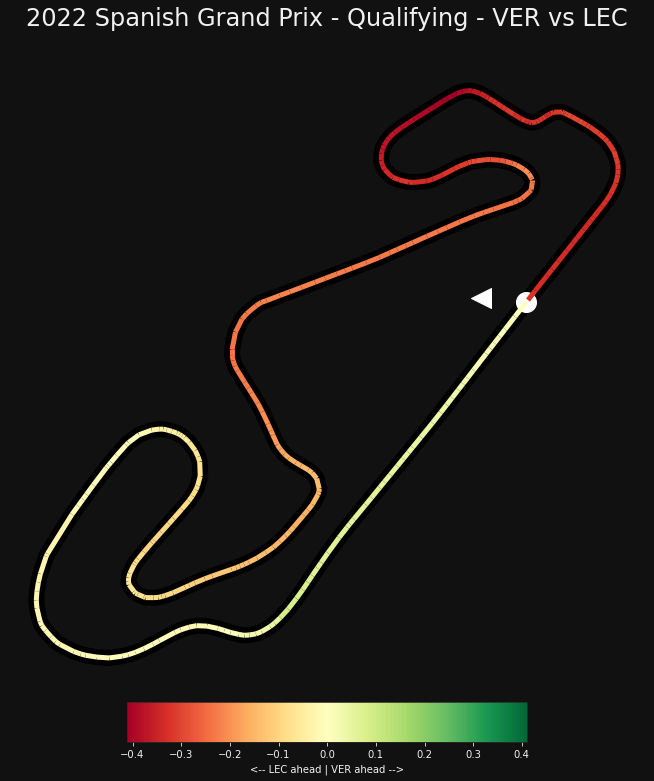

In [24]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [25]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [26]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [46]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [59]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [78]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [73]:
def plot_compare_points(df_drivers):
    
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line
    
    driver_1_team_color = '#' + results[results['Abbreviation'] == driver_1]['TeamColor'][0]
    driver_2_team_color = '#' + results[results['Abbreviation'] == driver_2]['TeamColor'][0]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [74]:
plot_compare_points(df_drivers_standings)

In [79]:
round_mapping = {}
for i in events_list.itertuples():
    round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation

df_constructors.columns = df_constructors.columns.map(round_mapping)
df_constructors

,nan,nan,nan,nan,nan,nan,nan
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [63]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [76]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [82]:
def get_drivers_standings_df():
    
    df = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('../data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [81]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [83]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [ ]:
def format_results_race(results, session_type):
    
    results['Name'] = results['FirstName'] + ' ' + results['LastName']
    if session_type == 'R' or session_type == 'r' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['Name','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        
    elif session_type == 'Q' or session_type == 'q':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3
        results_formatted = results_formatted[['Name','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted['Position'] = results_formatted['Position'].astype(int)
            
    return results_formatted  
    

In [ ]:
format_results_race(session.results, ses).head(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
16,Charles Leclerc,Ferrari,1,1:19.861,1:19.969,1:18.750
1,Max Verstappen,Red Bull Racing,2,1:20.091,1:19.219,1:19.073
55,Carlos Sainz,Ferrari,3,1:19.892,1:19.453,1:19.166
63,George Russell,Mercedes,4,1:20.218,1:19.470,1:19.393
11,Sergio Perez,Red Bull Racing,5,1:20.447,1:19.830,1:19.420
44,Lewis Hamilton,Mercedes,6,1:20.252,1:19.794,1:19.512
77,Valtteri Bottas,Alfa Romeo,7,1:20.355,1:20.053,1:19.608
20,Kevin Magnussen,Haas F1 Team,8,1:20.227,1:19.810,1:19.682
3,Daniel Ricciardo,McLaren,9,1:20.549,1:20.287,1:20.297
47,Mick Schumacher,Haas F1 Team,10,1:20.683,1:20.436,1:20.638


In [ ]:
format_results_race(session.results, ses).tail(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
4,Lando Norris,McLaren,11,1:20.838,1:20.471,
31,Esteban Ocon,Alpine,12,1:20.880,1:20.638,
22,Yuki Tsunoda,AlphaTauri,13,1:20.707,1:20.639,
10,Pierre Gasly,AlphaTauri,14,1:20.719,1:20.861,
24,Guanyu Zhou,Alfa Romeo,15,1:20.476,1:21.094,
5,Sebastian Vettel,Aston Martin,16,1:20.954,,
14,Fernando Alonso,Alpine,17,1:21.043,,
18,Lance Stroll,Aston Martin,18,1:21.418,,
23,Alexander Albon,Williams,19,1:21.645,,
6,Nicholas Latifi,Williams,20,1:21.915,,


In [ ]:
session.results.tail(10)

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points,Name
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,11.0,0.0,0 days 00:01:20.838000,0 days 00:01:20.471000,NaT,NaT,,0.0,Lando Norris
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,12.0,0.0,0 days 00:01:20.880000,0 days 00:01:20.638000,NaT,NaT,,0.0,Esteban Ocon
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,13.0,0.0,0 days 00:01:20.707000,0 days 00:01:20.639000,NaT,NaT,,0.0,Yuki Tsunoda
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,14.0,0.0,0 days 00:01:20.719000,0 days 00:01:20.861000,NaT,NaT,,0.0,Pierre Gasly
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,15.0,0.0,0 days 00:01:20.476000,0 days 00:01:21.094000,NaT,NaT,,0.0,Guanyu Zhou
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,16.0,0.0,0 days 00:01:20.954000,NaT,NaT,NaT,,0.0,Sebastian Vettel
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,17.0,0.0,0 days 00:01:21.043000,NaT,NaT,NaT,,0.0,Fernando Alonso
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,18.0,0.0,0 days 00:01:21.418000,NaT,NaT,NaT,,0.0,Lance Stroll
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,19.0,0.0,0 days 00:01:21.645000,NaT,NaT,NaT,,0.0,Alexander Albon
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,20.0,0.0,0 days 00:01:21.915000,NaT,NaT,NaT,,0.0,Nicholas Latifi
